In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE


In [ ]:
uss = pd.read_excel('ussindy.xlsx')
uss.head(10)

,LAST,FIRST,ROLE,PAY GRADE,RANK,BIRTH YEAR,LS,CITY,STATE
0,ABBOTT,George,S1,E-5,Enlisted,1924.0,0,Bedford,KY
1,ACOSTA,Charles,MM3,E-4,Enlisted,1925.0,0,New Orleans,LA
2,ADAMS,Leo,S1,E-5,Enlisted,1927.0,1,Detroit,MI
3,ADAMS,Pat,S2,E-6,Enlisted,1926.0,0,Monroe,LA
4,ADORANTE,Dante,S2,E-6,Enlisted,1928.0,0,Rochester,NY
5,AKINES,William,S2,E-6,Enlisted,1927.0,1,Chattanooga,TN
6,ALBRIGHT,Charles,COX,E-2,Enlisted,1925.0,0,Redondo Beach,CA
7,ALLARD,Vincent,QM3,E-4,Enlisted,1918.0,1,Omak,WA
8,ALLEN,Paul,S1,E-5,Enlisted,1926.0,0,Tuscaloosa,AL
9,ALLMARAS,Harold,F2,E-6,Enlisted,1926.0,0,Newell,CA


In [ ]:
#counting number of rows and columns
uss = uss.drop(['CITY'], axis=1)


In [ ]:
uss['BIRTH YEAR'] = uss['BIRTH YEAR'].fillna(uss['BIRTH YEAR'].mean()).round(0).astype(int)


In [ ]:
#turning "RANK" into boolean values, 0 = Enlisted, 1 = CO
uss = pd.get_dummies(uss, columns=['RANK'])
uss = uss.drop(columns=['RANK_Enlisted'])
uss.head()

,LAST,FIRST,ROLE,PAY GRADE,BIRTH YEAR,LS,STATE,RANK_CO
0,ABBOTT,George,S1,E-5,1924,0,KY,0
1,ACOSTA,Charles,MM3,E-4,1925,0,LA,0
2,ADAMS,Leo,S1,E-5,1927,1,MI,0
3,ADAMS,Pat,S2,E-6,1926,0,LA,0
4,ADORANTE,Dante,S2,E-6,1928,0,NY,0


In [ ]:
uss['INDEX'] = uss.index

In [ ]:
#Getting Statistics
uss.count()

LAST          1195
FIRST         1195
ROLE          1195
PAY GRADE     1195
BIRTH YEAR    1195
LS            1195
STATE         1195
RANK_CO       1195
INDEX         1195
dtype: int64

In [ ]:
#Getting a count of the number of survivors, 0 = Lost at Sea, 1 = Survived
uss['LS'].value_counts()

0    880
1    315
Name: LS, dtype: int64

In [ ]:
uss['PAY GRADE'].value_counts()

E-6    369
E-5    265
E-4    178
E-3    165
E-2     98
E-1     29
O-1     28
O-2     24
O-3     16
E-7      9
O-4      8
O-6      3
O-5      3
Name: PAY GRADE, dtype: int64

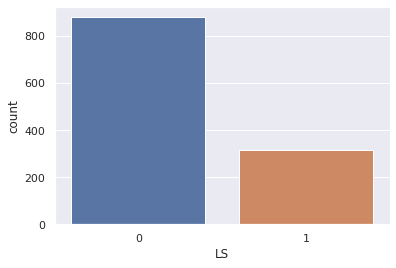

In [ ]:
#visualize the count of number of survivors
sns.set(style="darkgrid")
sns.countplot(x = 'LS', data = uss)

Survival Rate by Enlisted v Commissioned Officers




In [ ]:
percentage = uss.groupby('RANK_CO')[['LS']].mean()*100
percentage

,LS
RANK_CO,
0,26.954178
1,18.292683


Survival Rate by Pay-Grade

In [ ]:
pay_grade = uss.groupby('PAY GRADE')[['LS']].mean()*100

Visualization of survival rates

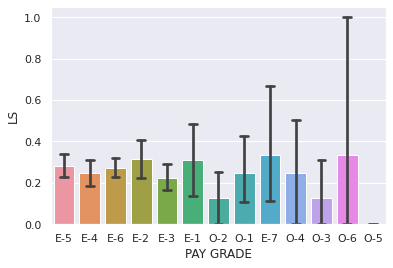

In [ ]:
sns.barplot(x='PAY GRADE', y="LS", data= uss, capsize=.3)

Tests Below

In [ ]:
dropped_uss = uss.drop(columns=['LAST','FIRST','PAY GRADE', 'STATE', 'ROLE'])
dropped_uss.head()

,BIRTH YEAR,LS,RANK_CO,INDEX
0,1924,0,0,0
1,1925,0,0,1
2,1927,1,0,2
3,1926,0,0,3
4,1928,0,0,4


In [ ]:
uss.head()

,LAST,FIRST,ROLE,PAY GRADE,BIRTH YEAR,LS,STATE,RANK_CO,INDEX
0,ABBOTT,George,S1,E-5,1924,0,KY,0,0
1,ACOSTA,Charles,MM3,E-4,1925,0,LA,0,1
2,ADAMS,Leo,S1,E-5,1927,1,MI,0,2
3,ADAMS,Pat,S2,E-6,1926,0,LA,0,3
4,ADORANTE,Dante,S2,E-6,1928,0,NY,0,4


In [ ]:
non_dropped = pd.get_dummies(uss, columns=['PAY GRADE', 'STATE'])


,LAST,FIRST,ROLE,BIRTH YEAR,LS,RANK_CO,INDEX,PAY GRADE_E-1,PAY GRADE_E-2,PAY GRADE_E-3,PAY GRADE_E-4,PAY GRADE_E-5,PAY GRADE_E-6,PAY GRADE_E-7,PAY GRADE_O-1,PAY GRADE_O-2,PAY GRADE_O-3,PAY GRADE_O-4,PAY GRADE_O-5,PAY GRADE_O-6,STATE_AL,STATE_AR,STATE_AZ,STATE_CA,STATE_CO,STATE_CT,STATE_DC,STATE_DE,STATE_FL,STATE_GA,STATE_IA,STATE_ID,STATE_IL,STATE_IN,STATE_KS,STATE_KY,STATE_LA,STATE_MA,STATE_MD,STATE_MI,STATE_MN,STATE_MO,STATE_MS,STATE_MT,STATE_NC,STATE_ND,STATE_NE,STATE_NH,STATE_NJ,STATE_NM,STATE_NV,STATE_NY,STATE_OH,STATE_OK,STATE_OR,STATE_PA,STATE_RI,STATE_SC,STATE_SD,STATE_TN,STATE_TX,STATE_UT,STATE_VA,STATE_WA,STATE_WI,STATE_WV,STATE_WY
0,ABBOTT,George,S1,1924,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ACOSTA,Charles,MM3,1925,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,ADAMS,Leo,S1,1927,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,ADAMS,Pat,S2,1926,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,ADORANTE,Dante,S2,1928,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
non_dropped = non_dropped.drop(columns=['LAST','FIRST','ROLE'])
non_dropped.head()

,BIRTH YEAR,LS,RANK_CO,INDEX,PAY GRADE_E-1,PAY GRADE_E-2,PAY GRADE_E-3,PAY GRADE_E-4,PAY GRADE_E-5,PAY GRADE_E-6,PAY GRADE_E-7,PAY GRADE_O-1,PAY GRADE_O-2,PAY GRADE_O-3,PAY GRADE_O-4,PAY GRADE_O-5,PAY GRADE_O-6,STATE_AL,STATE_AR,STATE_AZ,STATE_CA,STATE_CO,STATE_CT,STATE_DC,STATE_DE,STATE_FL,STATE_GA,STATE_IA,STATE_ID,STATE_IL,STATE_IN,STATE_KS,STATE_KY,STATE_LA,STATE_MA,STATE_MD,STATE_MI,STATE_MN,STATE_MO,STATE_MS,STATE_MT,STATE_NC,STATE_ND,STATE_NE,STATE_NH,STATE_NJ,STATE_NM,STATE_NV,STATE_NY,STATE_OH,STATE_OK,STATE_OR,STATE_PA,STATE_RI,STATE_SC,STATE_SD,STATE_TN,STATE_TX,STATE_UT,STATE_VA,STATE_WA,STATE_WI,STATE_WV,STATE_WY
0,1924,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1925,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1927,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1926,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1928,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Basic Logistic Regression (Dropped Columns)


In [ ]:
X = dropped_uss.drop(['LS','INDEX'], axis=1)
y = dropped_uss['LS']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
lg = LogisticRegression()

In [ ]:
lg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = lg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
accuracy_score(y_test, predictions)

0.7324414715719063

Basic Logistic Regression (Dummy all columns)

In [ ]:
X = non_dropped.drop(['LS', 'INDEX'], axis=1)
y = non_dropped['LS']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
lg2 = LogisticRegression()
lg2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred2 = lg2.predict(X_test)

In [ ]:
lg_acc = accuracy_score(y_test, pred2)

###K-Means Clustering

In [ ]:
kmeans = KNeighborsClassifier()

In [ ]:
kmeans.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
kpredictions = kmeans.predict(X_test)

In [ ]:
kmeans_acc = accuracy_score(y_test, predictions)

###Decision Tree Classifier

In [ ]:
tree = DecisionTreeClassifier()

In [ ]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
treePredictions = tree.predict(X_test)

In [ ]:
dtc_acc = accuracy_score(y_test,treePredictions)

Random Forest Classifier

In [ ]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
forest_predict = forest.predict(X_test)
forest_acc = accuracy_score(y_test, forest_predict)

Summary of Different Models

In [ ]:
print("Decision Tree Testing Accuracy: ", dtc_acc)
confusion_matrix(list(y_test), treePredictions)

Decision Tree Testing Accuracy:  0.6655518394648829


array([[184,  41],
       [ 59,  15]])

In [ ]:
print("KMeans Clustering Testing Accuracy: ", kmeans_acc)
confusion_matrix(list(y_test), kpredictions)

KMeans Clustering Testing Accuracy:  0.7525083612040134


array([[202,  23],
       [ 67,   7]])

In [ ]:
print("Logistic Regression Testing Accuracy: ", lg_acc)
confusion_matrix(list(y_test), pred2)

Logistic Regression Testing Accuracy:  0.7324414715719063


array([[218,   7],
       [ 73,   1]])

In [ ]:
print("Random Forest Testing Accuracy ", forest_acc)
confusion_matrix(list(y_test), forest_predict)

Random Forest Testing Accuracy  0.6989966555183946


array([[196,  29],
       [ 61,  13]])

In [ ]:
#Get feature importance
rfe = RFE(lg2, 6)
rfe = rfe.fit(X_test, y_test)

In [ ]:
print('Selected features: %s' % list(X_test.columns[rfe.support_]))

Selected features: ['RANK_CO', 'PAY GRADE_E-1', 'PAY GRADE_E-4', 'STATE_KY', 'STATE_MA', 'STATE_WV']


In [ ]:
viz = yellowbrick.FeatureImportances(lg2, stack=True, relative=False)
viz.fit(X_test, y_test)
viz.show()

AttributeError: ignored

In [ ]:
lg2.coef_.T

array([[-5.38308596e-04],
       [-2.55022262e-01],
       [-1.54470172e-01],
       [ 2.28329451e-01],
       [-3.46502587e-01],
       [ 2.13467416e-02],
       [ 5.09466030e-02],
       [ 1.30309119e-01],
       [ 3.19293898e-01],
       [ 1.11880496e-01],
       [-3.26248675e-01],
       [-2.65408369e-01],
       [ 2.40991027e-01],
       [-1.36279621e-01],
       [ 1.20042880e-01],
       [ 4.80900081e-01],
       [-4.45142549e-02],
       [ 4.16677293e-01],
       [ 6.80319121e-03],
       [ 6.54949162e-02],
       [ 2.65561564e-02],
       [-1.38710516e-01],
       [-3.45468809e-01],
       [ 2.96680544e-01],
       [-4.18851685e-01],
       [-4.48639397e-01],
       [ 7.68943719e-01],
       [ 4.92528042e-02],
       [-1.62641607e-01],
       [-1.23064325e-01],
       [-7.47765734e-01],
       [-4.02501050e-01],
       [ 3.91985853e-01],
       [-1.09747586e-01],
       [-9.80736730e-02],
       [ 8.71468717e-01],
       [-2.55738439e-01],
       [-4.77483812e-01],
       [-1.5

In [ ]:
list(non_dropped)

['BIRTH YEAR',
 'LS',
 'RANK_CO',
 'INDEX',
 'PAY GRADE_E-1',
 'PAY GRADE_E-2',
 'PAY GRADE_E-3',
 'PAY GRADE_E-4',
 'PAY GRADE_E-5',
 'PAY GRADE_E-6',
 'PAY GRADE_E-7',
 'PAY GRADE_O-1',
 'PAY GRADE_O-2',
 'PAY GRADE_O-3',
 'PAY GRADE_O-4',
 'PAY GRADE_O-5',
 'PAY GRADE_O-6',
 'STATE_AL',
 'STATE_AR',
 'STATE_AZ',
 'STATE_CA',
 'STATE_CO',
 'STATE_CT',
 'STATE_DC',
 'STATE_DE',
 'STATE_FL',
 'STATE_GA',
 'STATE_IA',
 'STATE_ID',
 'STATE_IL',
 'STATE_IN',
 'STATE_KS',
 'STATE_KY',
 'STATE_LA',
 'STATE_MA',
 'STATE_MD',
 'STATE_MI',
 'STATE_MN',
 'STATE_MO',
 'STATE_MS',
 'STATE_MT',
 'STATE_NC',
 'STATE_ND',
 'STATE_NE',
 'STATE_NH',
 'STATE_NJ',
 'STATE_NM',
 'STATE_NV',
 'STATE_NY',
 'STATE_OH',
 'STATE_OK',
 'STATE_OR',
 'STATE_PA',
 'STATE_RI',
 'STATE_SC',
 'STATE_SD',
 'STATE_TN',
 'STATE_TX',
 'STATE_UT',
 'STATE_VA',
 'STATE_WA',
 'STATE_WI',
 'STATE_WV',
 'STATE_WY']

In [ ]:
np.array([uss_columns[1:-1]]).T

array([['LS'],
       ['RANK_CO'],
       ['INDEX'],
       ['PAY GRADE_E-1'],
       ['PAY GRADE_E-2'],
       ['PAY GRADE_E-3'],
       ['PAY GRADE_E-4'],
       ['PAY GRADE_E-5'],
       ['PAY GRADE_E-6'],
       ['PAY GRADE_E-7'],
       ['PAY GRADE_O-1'],
       ['PAY GRADE_O-2'],
       ['PAY GRADE_O-3'],
       ['PAY GRADE_O-4'],
       ['PAY GRADE_O-5'],
       ['PAY GRADE_O-6'],
       ['STATE_AL'],
       ['STATE_AR'],
       ['STATE_AZ'],
       ['STATE_CA'],
       ['STATE_CO'],
       ['STATE_CT'],
       ['STATE_DC'],
       ['STATE_DE'],
       ['STATE_FL'],
       ['STATE_GA'],
       ['STATE_IA'],
       ['STATE_ID'],
       ['STATE_IL'],
       ['STATE_IN'],
       ['STATE_KS'],
       ['STATE_KY'],
       ['STATE_LA'],
       ['STATE_MA'],
       ['STATE_MD'],
       ['STATE_MI'],
       ['STATE_MN'],
       ['STATE_MO'],
       ['STATE_MS'],
       ['STATE_MT'],
       ['STATE_NC'],
       ['STATE_ND'],
       ['STATE_NE'],
       ['STATE_NH'],
       ['STATE_NJ'],


In [ ]:
feature_imporance = pd.DataFrame(np.hstack((np.array([uss_columns[1:-1]]).T, lg2.coef_.T)), columns =[ 'Features', 'Importance'])

In [ ]:
feature_imporance['Importance'] = pd.to_numeric(feature_imporance['Importance'])

In [ ]:
feature_imporance.sort_values(by='Importance', ascending=False)

,Features,Importance
48,STATE_OH,1.478167
35,STATE_MI,0.871469
26,STATE_IA,0.768944
15,PAY GRADE_O-6,0.480900
55,STATE_TN,0.471798
...,...,...
37,STATE_MO,-0.477484
46,STATE_NV,-0.717588
30,STATE_KS,-0.747766
53,STATE_SC,-0.752744
